In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r"C:\Users\rashe\Downloads\House_Prices.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Home          128 non-null    int64  
 1   Price         128 non-null    int64  
 2   SqFt          127 non-null    float64
 3   Bedrooms      128 non-null    int64  
 4   Bathrooms     128 non-null    int64  
 5   Offers        128 non-null    int64  
 6   Brick         128 non-null    object 
 7   Neighborhood  127 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 8.1+ KB


In [5]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790.0,2,2,2,No,East
1,2,114200,2030.0,4,2,3,No,East
2,3,114800,1740.0,3,2,1,No,East
3,4,94700,1980.0,3,2,3,No,East
4,5,119800,2130.0,3,3,3,No,East


In [6]:
df.tail()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
123,124,119700,1900.0,3,3,3,Yes,East
124,125,147900,2160.0,4,3,3,Yes,NaN
125,126,113500,2070.0,2,2,2,No,North
126,127,149900,2020.0,3,3,1,No,West
127,128,124600,2250.0,3,3,4,No,North


In [7]:
df.shape                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

(128, 8)

In [8]:
df.isnull().sum()

Home            0
Price           0
SqFt            1
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    1
dtype: int64

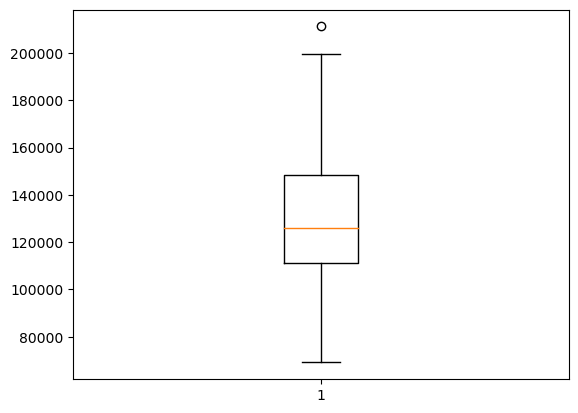

In [11]:
plt.boxplot(df['Price'])
plt.show()

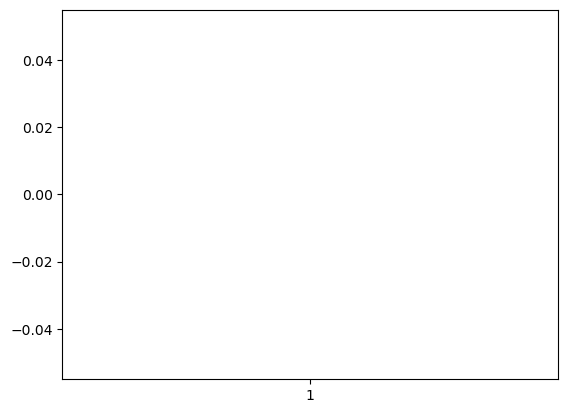

In [13]:
plt.boxplot(df['SqFt'])
plt.show()

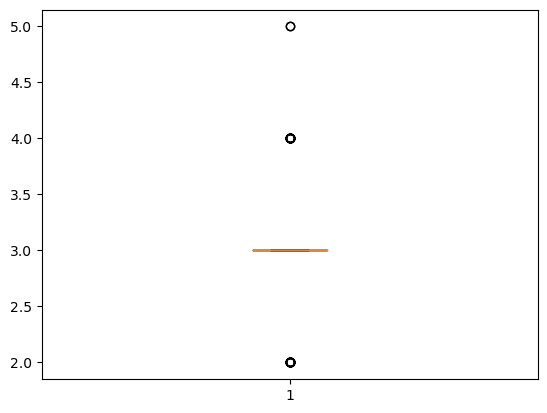

In [16]:
plt.boxplot(df['Bedrooms'])
plt.show()

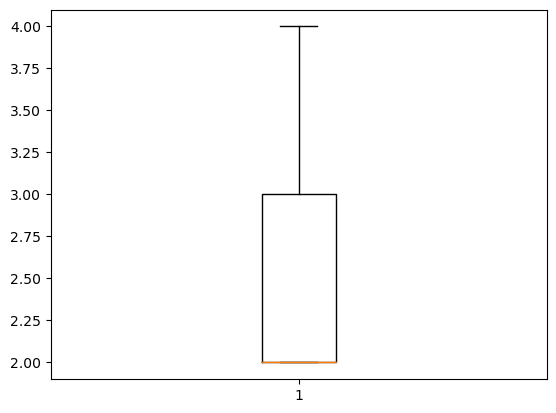

In [17]:
plt.boxplot(df['Bathrooms'])
plt.show()

In [18]:
def remove_outliers(d,c):
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    iqr=q3-q1  #calculate inner quartile range
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    data_without_outlier=d[(d[c]<=ub) & (d[c]>=lb)]
    
    return data_without_outlier

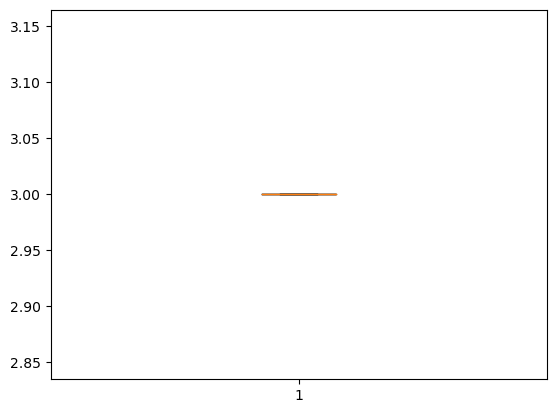

In [19]:
df=remove_outliers(df,'Bedrooms')

plt.boxplot(df['Bedrooms'])
plt.show()

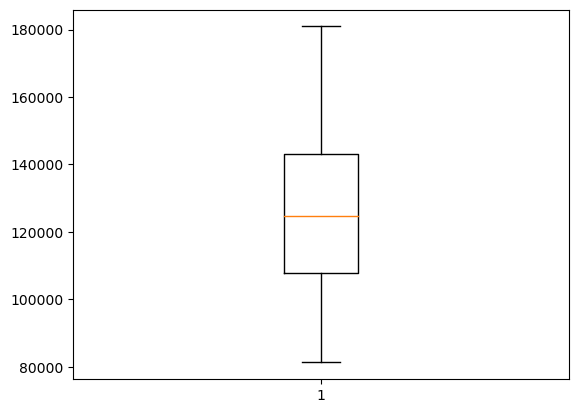

In [20]:
df=remove_outliers(df,'Price')

plt.boxplot(df['Price'])
plt.show()

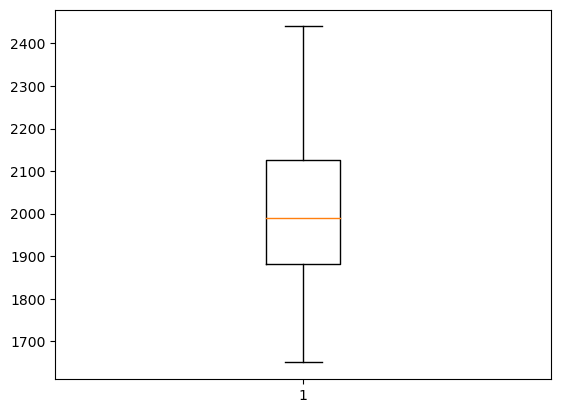

In [21]:
df=remove_outliers(df,'SqFt')

plt.boxplot(df['SqFt'])
plt.show()

In [22]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

C:\Users\rashe\AppData\Local\Temp\ipykernel_8288\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

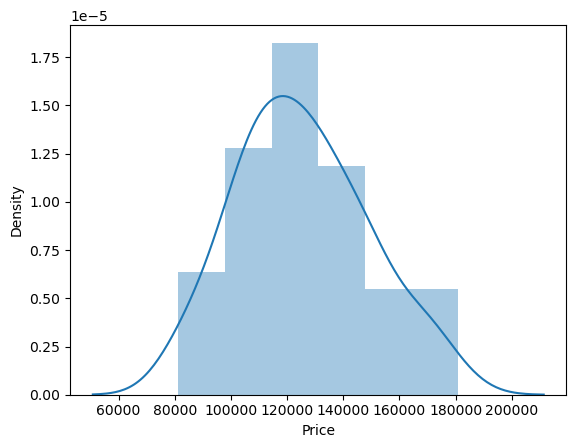

In [23]:
sns.distplot(df['Price'])

C:\Users\rashe\AppData\Local\Temp\ipykernel_8288\1113660390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SqFt'])


<Axes: xlabel='SqFt', ylabel='Density'>

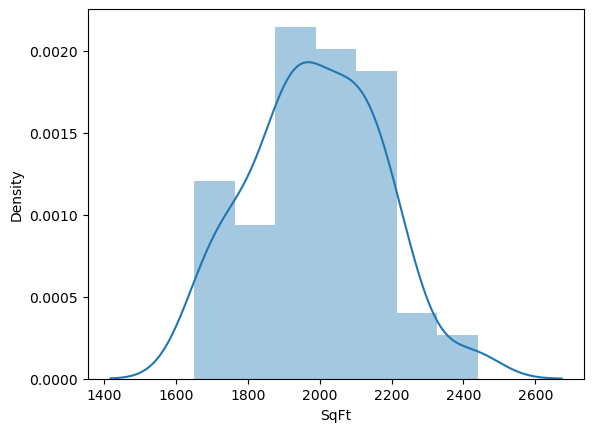

In [24]:
sns.distplot(df['SqFt'])

C:\Users\rashe\AppData\Local\Temp\ipykernel_8288\1345312943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bedrooms'])
C:\Users\rashe\Documents\Python Scripts\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='Bedrooms', ylabel='Density'>

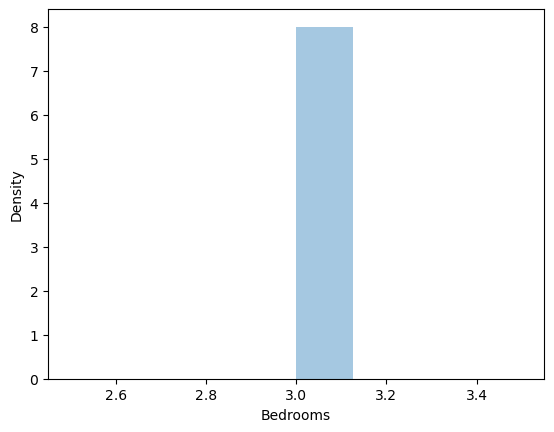

In [25]:
sns.distplot(df['Bedrooms'])

C:\Users\rashe\AppData\Local\Temp\ipykernel_8288\3286393789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bathrooms'])


<Axes: xlabel='Bathrooms', ylabel='Density'>

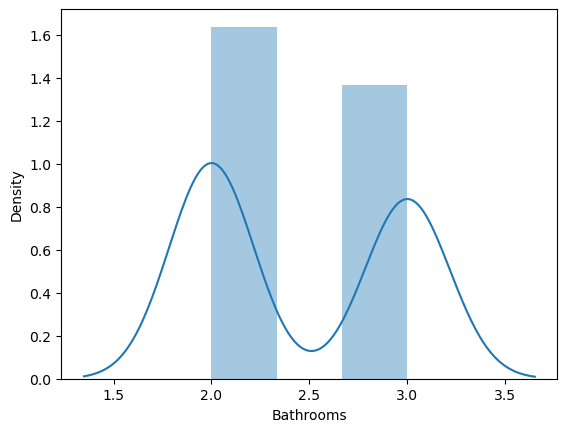

In [26]:
sns.distplot(df['Bathrooms'])

<Axes: xlabel='Offers'>

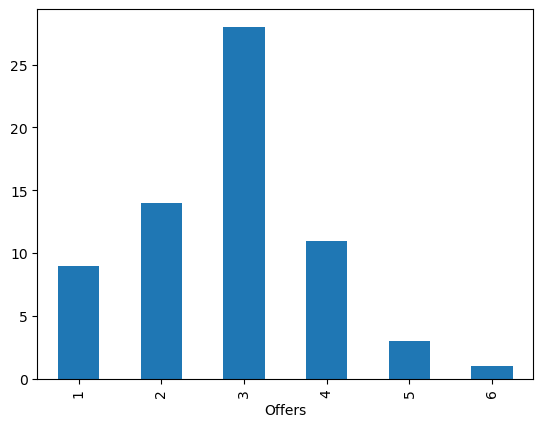

In [28]:
df.groupby('Offers')['Offers'].count().plot(kind='bar')

<Axes: xlabel='Bedrooms'>

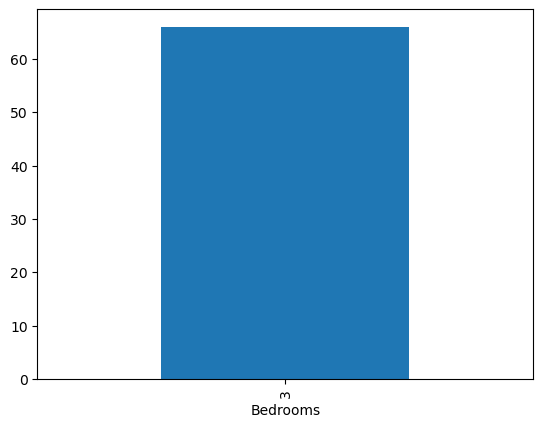

In [29]:
df.groupby('Bedrooms')['Bedrooms'].count().plot(kind='bar')

<Axes: xlabel='Neighborhood'>

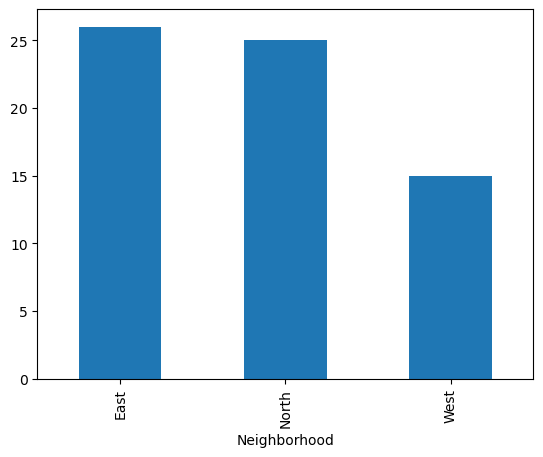

In [31]:
df.groupby('Neighborhood')['Neighborhood'].count().plot(kind='bar')

In [32]:
df_numeric=df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
2,3,114800,1740.0,3,2,1
3,4,94700,1980.0,3,2,3
4,5,119800,2130.0,3,3,3
5,6,114600,1780.0,3,2,2
6,7,151600,1830.0,3,3,3


In [36]:
df_numeric=df_numeric.drop(['Bedrooms','Offers','Bathrooms'],axis=1)
df_numeric.head()

,Home,Price,SqFt
2,3,114800,1740.0
3,4,94700,1980.0
4,5,119800,2130.0
5,6,114600,1780.0
6,7,151600,1830.0


<Axes: >

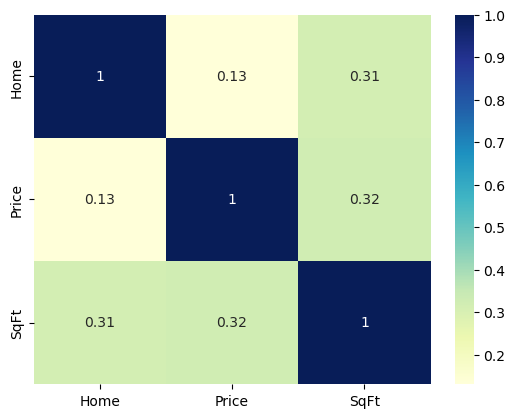

In [37]:
sns.heatmap(df_numeric.corr(),cmap='YlGnBu',annot=True)

In [38]:
df['Home']=df['Home'].astype('object') #astype used for variable conversion
df['Offers']=df['Offers'].astype('object')
df.dtypes

Home             object
Price             int64
SqFt            float64
Bedrooms          int64
Bathrooms         int64
Offers           object
Brick            object
Neighborhood     object
dtype: object

In [44]:
df_catagorical=df.select_dtypes(include='object')
df_catagorical.head()

,Home,Offers,Brick,Neighborhood
2,3,1,No,East
3,4,3,No,East
4,5,3,No,East
5,6,2,No,North
6,7,3,Yes,West


In [42]:
df_dummy=pd.get_dummies(df_catagorical,drop_first=True)
df_dummy.head()

,Home_4,Home_5,Home_6,Home_7,Home_10,Home_11,Home_13,Home_14,Home_17,Home_18,...,Home_127,Home_128,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Brick_Yes,Neighborhood_North,Neighborhood_West
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
6,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


In [46]:
df_final=pd.concat([df_numeric,df_dummy],axis=1) 
df_final.head()

,Home,Price,SqFt,Home_4,Home_5,Home_6,Home_7,Home_10,Home_11,Home_13,...,Home_127,Home_128,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Brick_Yes,Neighborhood_North,Neighborhood_West
2,3,114800,1740.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,94700,1980.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,5,119800,2130.0,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,6,114600,1780.0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
6,7,151600,1830.0,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True


In [47]:
x=df_final.drop('Price',axis=1)
y=df_final['Price']


In [48]:
from sklearn.linear_model import LinearRegression

In [49]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=999)

In [50]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(46, 75) (20, 75) (46,) (20,)


In [51]:
key_features=SelectKBest(score_func=f_regression,k=5)

#fit the key feature of training data and transform it

xtrain_selected=key_features.fit_transform(xtrain,ytrain)
selected_indices=key_features.get_support(indices=True)
selected_features=xtrain.columns[selected_indices]


In [52]:
selected_features

Index(['SqFt', 'Home_61', 'Brick_Yes', 'Neighborhood_North',
       'Neighborhood_West'],
      dtype='object')

In [53]:
linreg=LinearRegression()
#fit the model using training sample
linreg.fit(xtrain_selected,ytrain)
linreg.score(xtrain_selected,ytrain)#

0.7436240102905964

In [54]:
xtest_selected=xtest.iloc[:,selected_indices]
score=linreg.score(xtest_selected,ytest)
score

C:\Users\rashe\Documents\Python Scripts\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.6749590413119082

In [55]:
predicted_price=linreg.predict(xtest_selected)

C:\Users\rashe\Documents\Python Scripts\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [56]:
print(predicted_price)

[125682.42166561 113836.08451904 141899.57328526 117348.55907485
 133379.26522034 114275.14383852 132679.32757626 111640.78792166
 119974.65051242 113836.08451904 142152.18713058 102645.112857
 162527.09682136 110987.23992705 142152.18713058 104840.40945438
 120646.54495553  98469.00833737 135127.23801896  94517.47446208]


In [57]:
linreg.intercept_

26248.791268140005